In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2, chi2_contingency, fisher_exact, kendalltau
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

**Zadanie 1** Na podstawie danych wyznacz przedział ufności dla wektora prawodobieństw opisującego stopień zadowolenia ze szkolenia. Przyjmij poziom ufności 0.95. 

Czy wyniki się różnią w zależności od wybranej metody?

In [15]:
success = [14, 17, 40, 100, 29]
n = np.sum(success)
a = 0.05 / len(success)
wyniki = []
kategorie = [
    "Bardzo niezadowoleni",
    "Niezadowoleni",
    "Brak zdania",
    "Zadowoleni",
    "Bardzo zadowoleni",
]

for i in range(len(success)):
    p = success[i] / n
    beta = proportion_confint(success[i], n, alpha=a, method="beta")
    wilson = proportion_confint(success[i], n, alpha=a, method="wilson")
    normal = proportion_confint(success[i], n, alpha=a, method="normal")

    wyniki.append(
        {
            "Kategoria": kategorie[i],
            "Liczba pracowników": success[i],
            "Prawdopodobieństwo": f"{p:.4f}",
            "Beta": np.round(beta, 5),
            "Wilson": np.round(wilson, 5),
            "Normal": np.round(normal, 5),
        }
    )

df = pd.DataFrame(wyniki)
print(df)

              Kategoria  Liczba pracowników Prawdopodobieństwo  \
0  Bardzo niezadowoleni                  14             0.0700   
1         Niezadowoleni                  17             0.0850   
2           Brak zdania                  40             0.2000   
3            Zadowoleni                 100             0.5000   
4     Bardzo zadowoleni                  29             0.1450   

                 Beta              Wilson            Normalny  
0   [0.0317, 0.12989]  [0.03605, 0.13157]  [0.02353, 0.11647]  
1  [0.04208, 0.14866]  [0.04661, 0.15004]    [0.0342, 0.1358]  
2  [0.13257, 0.28218]  [0.13731, 0.28195]  [0.12714, 0.27286]  
3  [0.40735, 0.59265]    [0.4104, 0.5896]  [0.40893, 0.59107]  
4   [0.0875, 0.22005]  [0.09228, 0.22051]  [0.08087, 0.20913]  


**Zadanie 2.**

Napisz funkcję, która wyznacza wartość poziomu krytycznego w następujących testach:

• chi-kwadrat Pearsona

• chi-kwadrat największej wiarogodności 

służących do weryfikacji hipotezy H0 : p = p0 przy hipotezie alternatywnej H1 : p ̸= p0 na podstawie obserwacji x wektora losowego X z rozkładu wielomianowego z parametrami n i p.


In [24]:
def chichwadrat(vals: list[int], ps: list[float], n: int) -> float:
    stat = 0
    for i in range(len(vals)):
        stat += ((vals[i] - n * ps[i]) ** 2) / (n * ps[i])
    return 1 - chi2.cdf(stat, len(vals) - 1)


def IW(vals: list[int], ps: list[float], n: int) -> float:
    stat = 0
    for i in range(len(vals)):
        stat += vals[i] * np.log(vals[i] / (n * ps[i]))
    return 1 - chi2.cdf(2 * stat, len(ps) - 1)


prob = [0.2, 0.2, 0.2, 0.2, 0.2]
suc = [20, 30, 40, 50, 60]
n = np.sum(suc)
print(chichwadrat(suc, prob, n))
print(IW(suc, prob, n))

5.0309817823057656e-05
3.189008141235572e-05


**Zadanie 3.** 

Na podstawie danych z ankiety z poprzedniej listy zweryfikuj hipotezę, że w grupie pracowników zatrudnionwych w Dziale Produktowym rozkład odpowiedzi na pytanie "Jak bardzo zgadzasz się ze stwierdzeniem, że firma zapewnia odpowiednie wsparcie i materiały umożliwiające skuteczne wykorzystanie w praktyce wiedzy zdobytej w trakcie szkoleń?" jest równomierny, tzn. jest jednakowe prawdopodobienstwo, że pracownik zatrudniony w Dziale Produkcjnym udzielił odpowiedzi "zdecydowanie się nie zgadzam", "nie zgadzam się", "nie mam zdania", "zgadzam się", "zdecydowanie się zgadzam" na pytanie PYT_1. Przyjmij poziom istotności 0.05. Skorzystaj z funkcji napisanej w zadaniu 2.

In [25]:
sciezka = open(r"ankieta.csv")
ankieta = pd.read_csv(sciezka, sep=";", encoding="Latin2")

In [28]:
dane = ankieta[ankieta["DZIAŁ"] == "PD"]["PYT_1"].value_counts()
vals = dane.values
ps = [1 / 5] * 5

print('Dane do zbadania:\n', dane,
      '\nP-wartość z testu Pearsona:', chichwadrat(vals, ps, np.sum(vals)),
      '\nP-wartość z testu IW:', IW(vals, ps, np.sum(vals)))

Dane do hipotezy:
 PYT_1
 1    51
 0    17
 2    11
-1    10
-2     9
Name: count, dtype: int64 
P-wartość z testu Pearsona: 2.757793993168889e-13 
P-wartość z testu IW: 1.0701994845874196e-10


**Zadanie 4.**

Zapoznaj się z funkcjami służącymi do wykonania testu Fishera oraz testu Freemana-Haltona.

*R w Pythonie* 

Importujemy pakiet stats z R, który zawiera funkcję fisher.test()

In [ ]:
import os

os.environ["R_HOME"] = r"C:\Program Files\R\R-4.5.0"
os.environ["PATH"] += r"C:\Program Files\R\R-4.5.0\bin\x64"

import rpy2.robjects as ro

print(ro.r("R.version.string"))

from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri, pandas2ri

In [32]:
# Aktywacja konwersji pandas/numpy → R
pandas2ri.activate()
numpy2ri.activate()

stats = importr("stats")
m = np.array([[4, 4], [4, 5], [10, 6]])
print(stats.fisher_test(m))


	Fisher's Exact Test for Count Data

data:  structure(c(4L, 4L, 10L, 4L, 5L, 6L), dim = 3:2)
p-value = 0.6644
alternative hypothesis: two.sided




**Zadanie 5.**

Korzystajac z testu Fishera, na poziomie istotności 0.05, zweryfikuj hipotezę, że zmienna PŁeĆ i zmienna CZY_KIER są niezależne. Czy na poziomie istotności 0.05 możemy wnioskować, że prawdopodobieństwo tego, że na stanowisku kierowniczym pracuje kobieta jest równe prawdopodobienstwu tego, że na stanowisku kierowniczym pracuje mężczyzna? Uzasadnij odpowiedź

In [39]:
tabela = pd.crosstab(ankieta["PŁEĆ"], ankieta["CZY_KIER"], margins=False)
r_tabela = pandas2ri.py2rpy(tabela)

wynik = stats.fisher_test(r_tabela).rx2('p.value')[0]

print(tabela)
print(f'\np-wartość = {wynik:.4f}')

CZY_KIER  Nie  Tak
PŁEĆ              
K          63    8
M         110   19
p-wartość = 0.6659


**Zadanie 6.**
Korzystajac z testu Freemana-Haltona na poziomie istotnosci 0.05 zweryfikuj
poniższe hipotezy. Wykonaj podpunkty c), d), e) oraz d) zast˛epuj ˛ac zmienn ˛a PYT_2 przez zmienn ˛a
CZY_ZADOW zdefiniowan ˛a w zadaniu 1. w cz˛esci I z poprzedniej listy. Porównaj wyniki.

a) zajmowanie stanowiska kierowniczego nie zalezy od wieku (CZY_KIER oraz WIEK_KAT)

In [43]:
bins = [0, 35, 45, 55, float("inf")]
labels = ["<35", "36-45", "46-55", ">55"]
ankieta["WIEK_KAT"] = pd.cut(ankieta["WIEK"], bins=bins, labels=labels)

In [44]:
tabA = pd.crosstab(ankieta["CZY_KIER"], ankieta["WIEK_KAT"], margins=False)
wynikA = stats.fisher_test(pandas2ri.py2rpy(tabA)).rx2('p.value')[0]
print(tabA)
print(f'\np-wartość = {wynikA:.4f}')

WIEK_KAT  <35  36-45  46-55  >55
CZY_KIER                        
Nie        23     91     39   20
Tak         3     13      6    5

p-wartość = 0.7823


b) zajmowanie stanowiska kierowniczego nie zalezy od sta ˙ zu pracy ( ˙ CZY_KIER oraz STAZ˙ ),

In [45]:
tabB = pd.crosstab(ankieta["CZY_KIER"], ankieta["STAŻ"], margins=False)
wynikB = stats.fisher_test(pandas2ri.py2rpy(tabB)).rx2('p.value')[0]
print(tabB)
print(f'\np-wartość = {wynikB:.4f}')

STAŻ       1    2   3
CZY_KIER             
Nie       40  123  10
Tak        1   17   9

p-wartość = 0.0001


c) stopien zadowolenia ze szkole ´ n w kontek ´ scie dopasowania do indywidualnych potrzeb ´
w pierwszym badanym okresie nie zalezy od zajmowanego stanowiska ( ˙ PYT_2 oraz
CZY_KIER),

In [47]:
tabc1 = pd.crosstab(ankieta["PYT_2"], ankieta["CZY_KIER"], margins=False)
wynikc1 = stats.fisher_test(pandas2ri.py2rpy(tabc1)).rx2('p.value')[0]
print(tabc1)
print(f'\np-wartość = {wynikc1:.4f}')

CZY_KIER  Nie  Tak
PYT_2             
-2         64   10
-1         18    2
 1          0    2
 2         91   13

p-wartość = 0.0443


In [48]:
ankieta["CZY_ZADOW"] = pd.cut(
    ankieta["PYT_2"],
    bins=[-2.5, 0, 2.5],
    labels=["Niezadowolony", "Zadowolony"],
)
tabc2 = pd.crosstab(ankieta["CZY_ZADOW"], ankieta["CZY_KIER"], margins=False)
wynikc2 = stats.fisher_test(pandas2ri.py2rpy(tabc2)).rx2('p.value')[0]
print(tabc2)
print(f'\np-wartość = {wynikc2:.4f}')

CZY_KIER       Nie  Tak
CZY_ZADOW              
Niezadowolony   82   12
Zadowolony      91   15

p-wartość = 0.8377


d) stopien zadowolenia ze szkole ´ n w kontek ´ scie dopasowania do indywidualnych potrzeb w ´
pierwszym badanym okresie nie zalezy od sta ˙ zu ( ˙ PYT_2 oraz STAZ˙ ),

In [49]:
tabd1 = pd.crosstab(ankieta["PYT_2"], ankieta["STAŻ"], margins=False)
wynikd1 = stats.fisher_test(pandas2ri.py2rpy(tabd1)).rx2('p.value')[0]
print(tabd1)
print(f'\np-wartość = {wynikd1:.4f}\n')

tabd2 = pd.crosstab(ankieta["CZY_ZADOW"], ankieta["STAŻ"], margins=False)
wynikd2 = stats.fisher_test(pandas2ri.py2rpy(tabd2)).rx2('p.value')[0]
print(tabd2)
print(f'\np-wartość = {wynikd2:.4f}')

STAŻ    1   2  3
PYT_2           
-2     20  45  9
-1      3  17  0
 1      0   0  2
 2     18  78  8

p-wartość = 0.0107
STAŻ            1   2   3
CZY_ZADOW                
Niezadowolony  23  62   9
Zadowolony     18  78  10

p-wartość = 0.4097


e) stopien zadowolenia ze szkole ´ n w kontek ´ scie dopasowania do indywidualnych potrzeb w ´
pierwszym badanym okresie nie zalezy od płci ( ˙ PYT_2 oraz PŁEC´ ),

In [50]:
tabe1 = pd.crosstab(ankieta["PYT_2"], ankieta["PŁEĆ"], margins=False)
wynike1 = stats.fisher_test(pandas2ri.py2rpy(tabe1)).rx2('p.value')[0]
print(tabe1)
print(f'\np-wartość = {wynike1:.4f}\n')

tabe2 = pd.crosstab(ankieta["CZY_ZADOW"], ankieta["PŁEĆ"], margins=False)
wynike2 = stats.fisher_test(pandas2ri.py2rpy(tabe2)).rx2('p.value')[0]
print(tabe2)
print(f'\np-wartość = {wynike2:.4f}')

PŁEĆ    K   M
PYT_2        
-2     25  49
-1     10  10
 1      1   1
 2     35  69

p-wartość = 0.4758

PŁEĆ            K   M
CZY_ZADOW            
Niezadowolony  35  59
Zadowolony     36  70

p-wartość = 0.6589


f) stopien zadowolenia ze szkole ´ n w kontek ´ scie dopasowania do indywidualnych potrzeb w ´
pierwszym badanym okresie nie zalezy od wieku ( ˙ PYT_2 oraz WIEK_KAT).

In [53]:
tabf1 = pd.crosstab(ankieta["PYT_2"], ankieta["WIEK_KAT"], margins=False)
wynikf1 = stats.fisher_test(pandas2ri.py2rpy(tabf1), workspace=1e6).rx2('p.value')[0]
print(tabf1)
print(f'\np-wartość = {wynikf1:.4f}\n')

tabf2 = pd.crosstab(ankieta["CZY_ZADOW"], ankieta["WIEK_KAT"], margins=False)
wynikf2 = stats.fisher_test(pandas2ri.py2rpy(tabf2), workspace=1e6).rx2('p.value')[0]
print(tabf2)
print(f'\np-wartość = {wynikf2:.4f}')

WIEK_KAT  <35  36-45  46-55  >55
PYT_2                           
-2          9     42     12   11
-1          1      9      6    4
 1          0      1      0    1
 2         16     52     27    9

p-wartość = 0.3194

WIEK_KAT       <35  36-45  46-55  >55
CZY_ZADOW                            
Niezadowolony   10     51     18   15
Zadowolony      16     53     27   10

p-wartość = 0.3275


# Część III
**Zadanie 8**
Korzystaj ˛ac z funkcji poznanej w zadaniu 7. zweryfikuj hipotez˛e, ze stopie ˙ n´
zadowolenia ze szkolen w kontek ´ scie dopasowania do indywidualnych potrzeb w pierwszym ´
badanym okresie nie zalezy od zajmowanego stanowiska. Przyjmij poziom istotno ˙ sci 0 ´ .01.
Wynik testu porównaj z wynikiem uzyskanym w zadaniu 6. Zaprezentuj reszty wyznaczane w
tescie na wykresie asocjacyjnym i dokonaj jego interpretacji.

Wynik testu chi-kwadrat niezależności:
Statystyka chi² = 13.1137
p-value = 0.0044
Stopnie swobody = 3
Odrzucamy H0 – ocena szkoleń zależy od stanowiska.


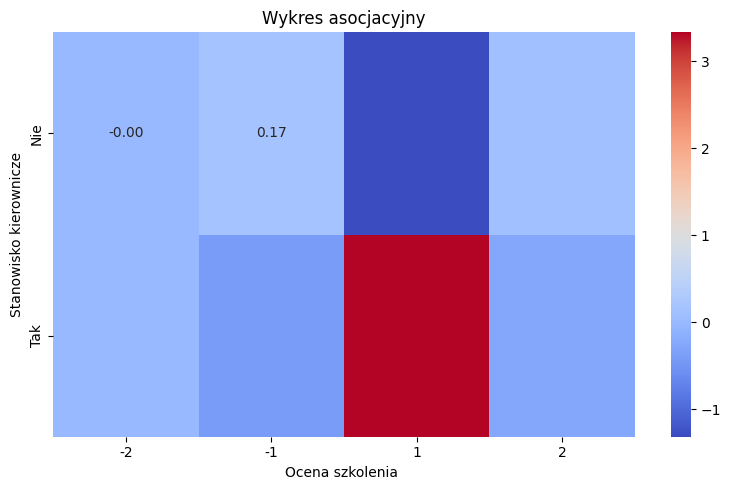

In [41]:
contingency = pd.crosstab(ankieta["CZY_KIER"], ankieta["PYT_2"])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency)

print("Wynik testu chi-kwadrat niezależności:")
print(f"Statystyka chi² = {chi2_stat:.4f}")
print(f"p-value = {p_value:.4f}")
print(f"Stopnie swobody = {dof}")

alpha = 0.01
if p_value < alpha:
    print("Odrzucamy H0 – ocena szkoleń zależy od stanowiska.")
else:
    print("Brak podstaw do odrzucenia H0 – ocena szkoleń NIE zależy od stanowiska.")

observed = contingency.values
residuals = (observed - expected) / np.sqrt(expected)

plt.figure(figsize=(8, 5))
sns.heatmap(
    residuals,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    xticklabels=contingency.columns,
    yticklabels=contingency.index,
)
plt.title("Wykres asocjacyjny")
plt.xlabel("Ocena szkolenia ")
plt.ylabel("Stanowisko kierownicze")
plt.tight_layout()
plt.show()

**Zadanie 9.**
Zapoznaj si˛e z funkcj ˛a słuzac ˛a do generowania realizacji wektorów losowych ˙
z rozkładu wielomianowego, a nast˛epnie korzystaj ˛ac z niej przeprowad´z symulacje w celu
oszacowania mocy testu Fishera oraz mocy testu chi-kwadrat Pearsona, generuj ˛ac dane z tabeli
2 × 2, w której p11 = 1/40, p12 = 3/40, p21 = 19/40, p22 = 17/40. Symulacje wykonaj dla
n = 50, n = 100 oraz n = 1000. Sformułuj wnioski.

In [42]:
def simulate_power(p, n, num_sim=10000, alpha=0.05):
    rejections_chi2 = 0
    rejections_fisher = 0

    for _ in range(num_sim):
        sample = np.random.multinomial(n, p)
        table = np.array([[sample[0], sample[1]], [sample[2], sample[3]]])

        try:
            chi2_stat, p_chi2, _, expected = chi2_contingency(table, correction=False)
            if np.all(expected > 0) and p_chi2 < alpha:
                rejections_chi2 += 1
        except ValueError:
            pass

        try:
            _, p_fisher = fisher_exact(table)
            if p_fisher < alpha:
                rejections_fisher += 1
        except ValueError:
            pass

    power_chi2 = rejections_chi2 / num_sim
    power_fisher = rejections_fisher / num_sim

    return power_chi2, power_fisher


p = [1 / 40, 3 / 40, 19 / 40, 17 / 40]
sample_sizes = [50, 100, 1000]

for n in sample_sizes:
    power_chi2, power_fisher = simulate_power(p, n)
    print(f"n = {n}:")
    print(f"  Moc testu chi-kwadrat: {power_chi2:.4f}")
    print(f"  Moc testu Fishera:     {power_fisher:.4f}")
    print()

n = 50:
  Moc testu chi-kwadrat: 0.1876
  Moc testu Fishera:     0.1145

n = 100:
  Moc testu chi-kwadrat: 0.3916
  Moc testu Fishera:     0.3131

n = 1000:
  Moc testu chi-kwadrat: 0.9996
  Moc testu Fishera:     0.9996



**Zadanie 10.**
Napisz funkcj˛e, która dla danych z tablicy dwudzielczej oblicza wartos´c poziomu ´
krytycznego w tescie niezale ´ znosci opartym na ilorazie wiarogodnosci. Korzystaj ˛ac z napisanej ˙
funkcji, wykonaj test dla danych przeanalizowanych w zadaniu 8.

In [45]:
def likelihood_ratio_test(table, alpha=0.01):

    observed = np.array(table)
    total = observed.sum()
    row_sums = observed.sum(axis=1)
    col_sums = observed.sum(axis=0)
    expected = np.outer(row_sums, col_sums) / total

    mask = observed > 0
    G2 = 2 * np.sum(observed[mask] * np.log(observed[mask] / expected[mask]))

    df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
    p_value = 1 - chi2.cdf(G2, df)
    critical_value = chi2.ppf(1 - alpha, df)

    return {
        "G2": G2,
        "p_value": p_value,
        "critical_value": critical_value,
        "df": df,
        "reject_H0": G2 > critical_value,
    }


contingency = pd.crosstab(ankieta["CZY_KIER"], ankieta["PYT_2"])
result = likelihood_ratio_test(contingency, alpha=0.01)
print(f"G² = {result['G2']:.4f}, stopnie swobody = {result['df']}")
print(f"p-wartość = {result['p_value']:.4f}")
print("Odrzucamy H0" if result["reject_H0"] else "Brak podstaw do odrzucenia H0")

AttributeError: 'numpy.float64' object has no attribute 'cdf'